In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for plots inside the notebook
%matplotlib inline

In [3]:
file_path = "../healthcare_dataset.csv"

df=pd.read_csv(file_path)

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.shape

(55500, 15)

In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [7]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [8]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])

In [9]:
daily_admissions = df.groupby('Date of Admission').size()

daily_admissions = daily_admissions.rename('admissions')

daily_admissions = daily_admissions.sort_index()

print(daily_admissions.head())
print(daily_admissions.tail())

Date of Admission
2019-05-08    27
2019-05-09    38
2019-05-10    17
2019-05-11    25
2019-05-12    36
Name: admissions, dtype: int64
Date of Admission
2024-05-03    31
2024-05-04    24
2024-05-05    26
2024-05-06    33
2024-05-07    33
Name: admissions, dtype: int64


In [10]:
daily_admissions = daily_admissions.asfreq("D", fill_value=0)

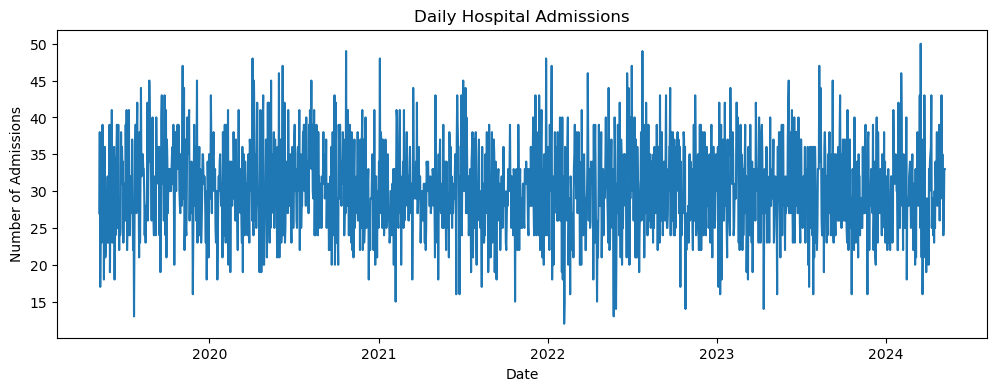

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(daily_admissions.index, daily_admissions.values)
plt.title("Daily Hospital Admissions")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.show()

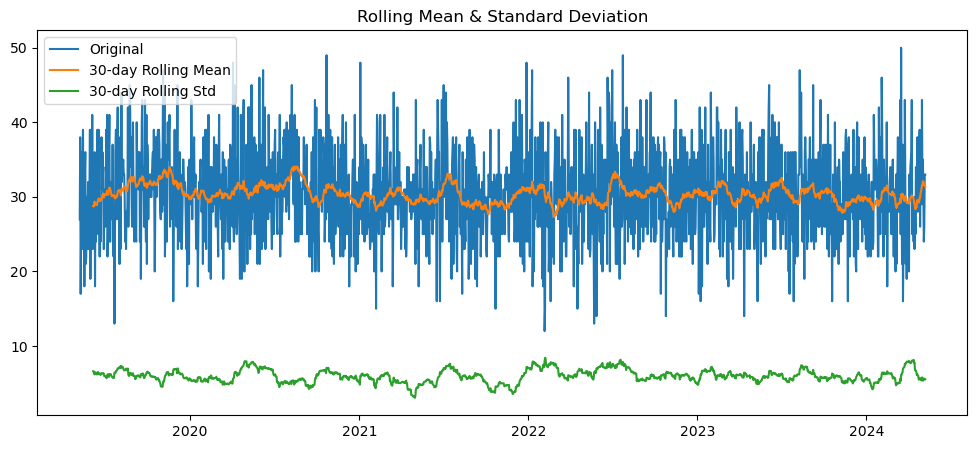

In [12]:
rolling_mean = daily_admissions.rolling(window=30).mean()
rolling_std = daily_admissions.rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(daily_admissions, label='Original')
plt.plot(rolling_mean, label='30-day Rolling Mean')
plt.plot(rolling_std, label='30-day Rolling Std')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_admissions)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -43.8477001478261
p-value: 0.0


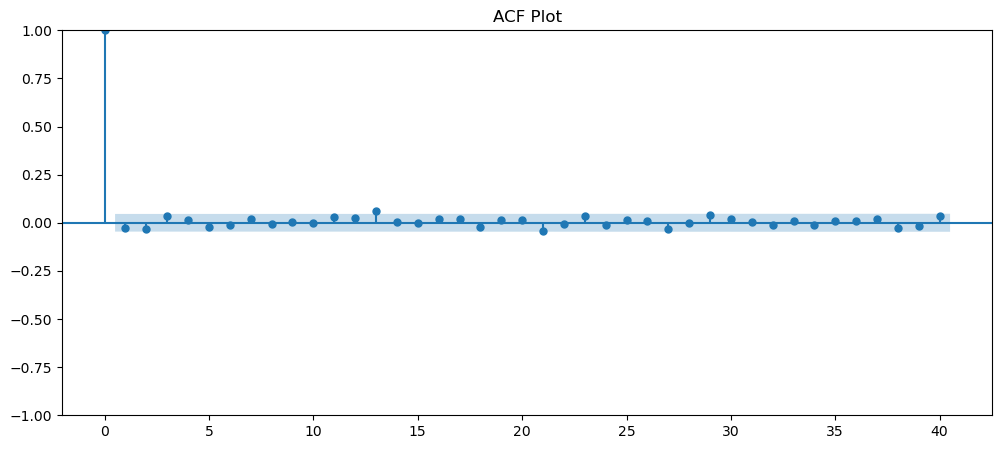

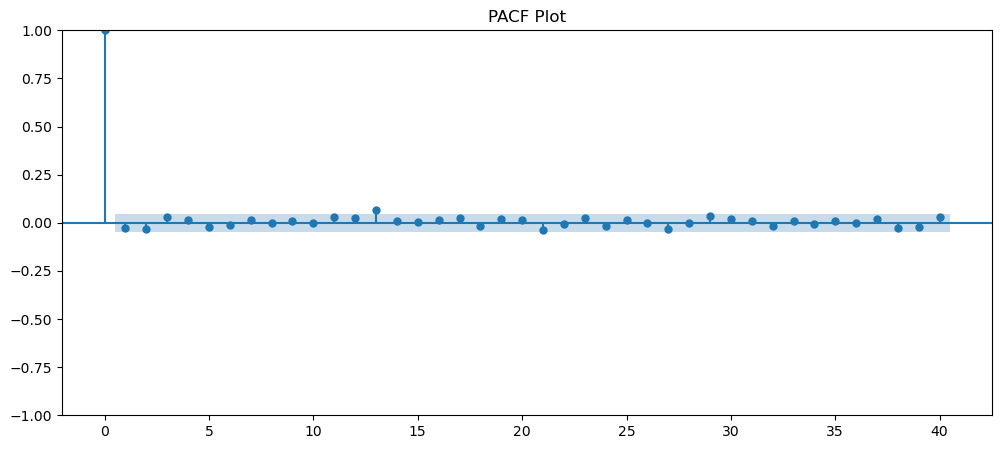

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,5))
plot_acf(daily_admissions, ax=plt.gca(), lags=40)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(daily_admissions, ax=plt.gca(), lags=40, method='ywm')
plt.title("PACF Plot")
plt.show()

In [15]:
#Training_Data

daily_admissions = daily_admissions.sort_index()

train_size = int(len(daily_admissions) * 0.7)

train = daily_admissions.iloc[:train_size]
test  = daily_admissions.iloc[train_size:]

print("Total length:", len(daily_admissions))
print("Train length:", len(train))
print("Test length:", len(test))


Total length: 1827
Train length: 1278
Test length: 549


In [16]:
print("\nTrain last dates:")
print(train.tail())

print("\nTest first dates:")
print(test.head())


Train last dates:
Date of Admission
2022-11-01    23
2022-11-02    34
2022-11-03    35
2022-11-04    26
2022-11-05    34
Freq: D, Name: admissions, dtype: int64

Test first dates:
Date of Admission
2022-11-06    28
2022-11-07    28
2022-11-08    33
2022-11-09    25
2022-11-10    22
Freq: D, Name: admissions, dtype: int64


In [17]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             admissions   No. Observations:                 1278
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4122.644
Date:                Mon, 29 Dec 2025   AIC                           8253.288
Time:                        12:44:44   BIC                           8273.900
Sample:                    05-08-2019   HQIC                          8261.028
                         - 11-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4523      0.167    182.278      0.000      30.125      30.780
ar.L1          0.2535      1.432      0.177      0.859      -2.553       3.060
ma.L1         -0.2715      1.424     -0.191      0.8

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
#Forecast_next_30_days

forecast = model_fit.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


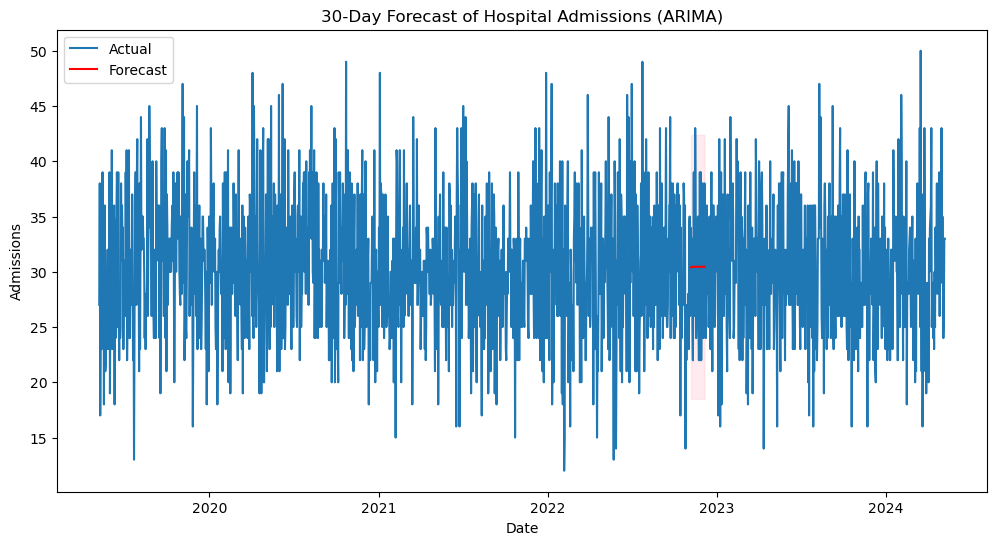

In [19]:
#Plot_forecast
plt.figure(figsize=(12,6))
plt.plot(daily_admissions, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:,0], 
                 forecast_ci.iloc[:,1], 
                 color='pink', alpha=0.3)

plt.title("30-Day Forecast of Hospital Admissions (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()

In [20]:
#Testing and Training for 180 days

test_days = 180

train = daily_admissions.iloc[:-test_days]
test = daily_admissions.iloc[-test_days:]

print("Train period:", train.index.min(), "to", train.index.max())
print("Test period :", test.index.min(), "to", test.index.max())
print("Train size:", len(train), "Test size:", len(test))

Train period: 2019-05-08 00:00:00 to 2023-11-09 00:00:00
Test period : 2023-11-10 00:00:00 to 2024-05-07 00:00:00
Train size: 1647 Test size: 180


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(train, order=(1, 0, 1))
arima_result = arima_model.fit(disp=False)

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:             admissions   No. Observations:                 1647
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -5309.469
Date:                Mon, 29 Dec 2025   AIC                          10624.939
Time:                        12:44:46   BIC                          10641.159
Sample:                    05-08-2019   HQIC                         10630.953
                         - 11-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    1.3e-06   7.69e+05      0.000       1.000       1.000
ma.L1         -0.9959      0.003   -355.783      0.000      -1.001      -0.990
sigma2        36.7725      1.324     27.767      0.0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [22]:
forecast_steps = len(test)

forecast_result = arima_result.get_forecast(steps=forecast_steps)
y_pred = forecast_result.predicted_mean

print("Predicted values index:", y_pred.index.min(), "to", y_pred.index.max())

Predicted values index: 2023-11-10 00:00:00 to 2024-05-07 00:00:00


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

eps = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100
accuracy = 100 - mape

print("ARIMA(1,0,1) performance on TEST set:")
print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE:", mape, "%")
print("Accuracy", accuracy, "%")

ARIMA(1,0,1) performance on TEST set:
RMSE: 5.967154253671139
MAE : 4.7130471127088125
MAPE: 16.769113686683646 %
Accuracy 83.23088631331635 %


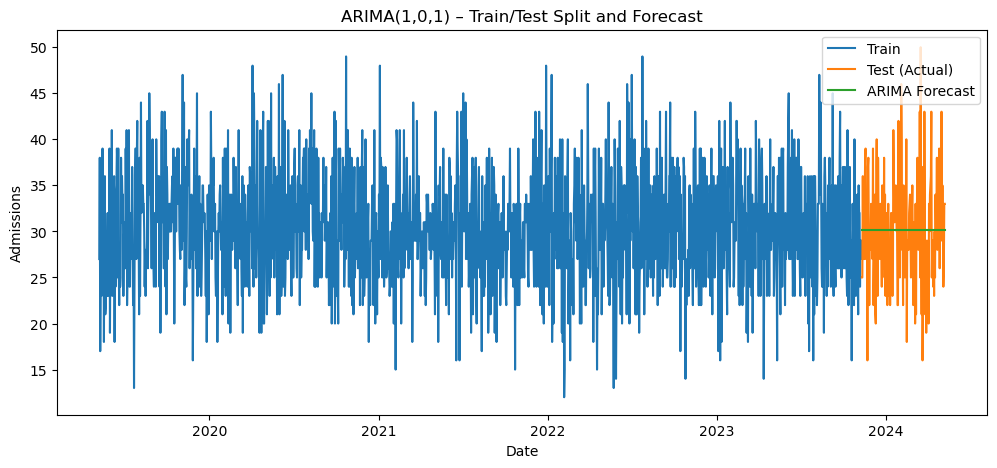

In [24]:
#For Plot

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(y_pred.index, y_pred, label="ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.title("ARIMA(1,0,1) – Train/Test Split and Forecast")
plt.legend()
plt.show()

In [25]:
y_test = test

arima_df = pd.DataFrame({
    "date": y_test.index,
    "actual": y_test.values,
    "arima_pred": y_pred.values
})

arima_df.to_csv("../180 days/predictions/arima_predictions.csv", index=False)